In [246]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
# import the dataset to train and evaluate the model
df = [] #for PCA features
# df.append(pd.read_csv(r"our_input_30/global_pca4.csv"))
df.append(pd.read_csv(r"our_input_subject2/global_pca4.csv"))
for dfs in df:
    dfs.columns = list(range(len(dfs.columns)))
df= pd.concat([dfs for dfs in df], axis=0).reset_index(drop=True)

In [324]:
# import the new dataset we want to apply the classifier on
df_mix=[]
# df_mix.append(pd.read_csv(r"our_input_30/mix_pca4.csv",header=None))
df_mix.append(pd.read_csv(r"our_input_subject2/mix_pca4.csv",header=None))
for dfs in df_mix:
    dfs.columns = list(range(len(dfs.columns)))
df_mix= pd.concat(df_mix, axis=0).reset_index(drop=True)

In [325]:
# extraction for features 3PC
X = df.drop(4,axis=1)
y = df.iloc[:, 4]              # output required

#extraction for mixed serie
X_mix = df_mix.drop(4,axis=1)
y_mix = df_mix.iloc[:, 4]              # output required


In [326]:
X_mix

,0,1,2,3
0,0.587198,-1.354081,-0.118923,-0.078275
1,0.172102,-0.790283,-0.269086,-0.109106
2,-0.232150,-1.220318,-0.229603,-0.108407
3,1.315346,-1.469767,-0.014981,-0.103934
4,-2.089986,-0.357387,-0.663129,0.303967
5,-2.196705,-0.705555,-0.324481,0.185481
6,-4.006944,3.032084,-0.008015,0.007919
7,-1.880145,-1.965357,0.062506,0.103368
8,1.349267,-0.367569,-0.119271,-0.273578
9,4.569171,1.172164,0.128981,0.054651


In [327]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [328]:
X_train

,0,1,2,3
5,-0.393327,-0.887152,-0.223432,1.262862
135,6.130111,0.498313,-0.171171,-0.490859
122,7.199507,3.227252,-0.486614,-1.827861
167,-2.812509,-0.551885,2.461181,-1.021278
85,-1.779951,0.531676,0.173375,-0.044410
...,...,...,...,...
106,-0.524510,-0.643526,0.190420,-0.174027
14,-0.182965,-0.681458,-0.398488,1.200848
92,7.228347,1.454113,-0.829201,-1.238449
179,0.233814,0.100262,-0.988617,-1.251542


In [329]:
y_train

5      0.0
135    4.0
122    4.0
167    5.0
85     2.0
      ... 
106    3.0
14     0.0
92     3.0
179    6.0
102    3.0
Name: 4, Length: 155, dtype: float64

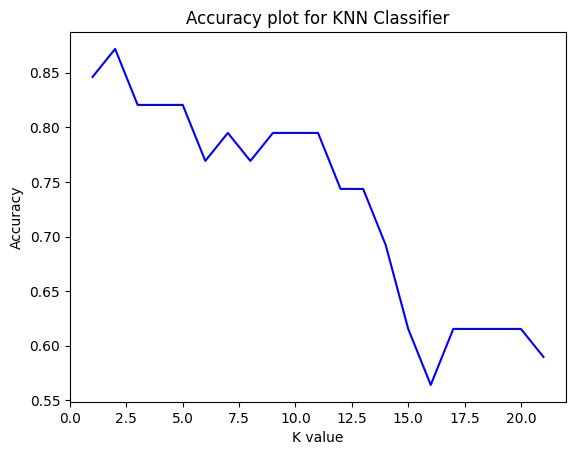

In [330]:
from sklearn.neighbors import KNeighborsClassifier # applying KNN for classification
k_value = [] 
k_accuracy = []

for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    score = knn.score(X_test,y_test)
    k_value.append(i)
    k_accuracy.append(score)
# for i,j in zip(k_value,k_accuracy):
    # print(i,j)

#Finding k for max acc
plt.plot(range(1,22),k_accuracy,color = "blue")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy plot for KNN Classifier")
plt.show()

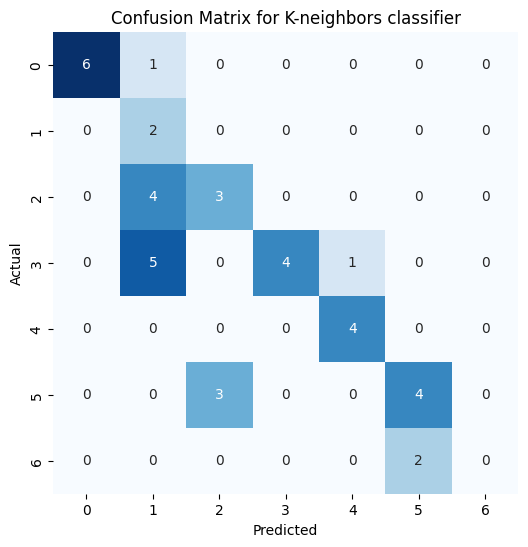

In [331]:
from sklearn.metrics import confusion_matrix
# y_pred = np.array(list(map(lambda x: np.argmax(x), knn.predict(X_test))))
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-neighbors classifier")
plt.show()


In [332]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.17      1.00      0.29         2
         2.0       0.50      0.43      0.46         7
         3.0       1.00      0.40      0.57        10
         4.0       0.80      1.00      0.89         4
         5.0       0.67      0.57      0.62         7
         6.0       0.00      0.00      0.00         2

    accuracy                           0.59        39
   macro avg       0.59      0.61      0.54        39
weighted avg       0.74      0.59      0.61        39



c:\Users\emmie\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emmie\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\emmie\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [333]:
from sklearn.ensemble import RandomForestClassifier  # applying random forest for classification
from sklearn.metrics import accuracy_score
rf_params = None

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.9487179487179487

In [334]:
# predict the mix movement serie with RF
y_pred_mix = rf.predict(X_mix)
print(y_pred_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))
df.to_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\results_pca4.csv", index=False, header=False)

[3. 3. 3. 3. 2. 2. 2. 2. 3. 4. 4. 4. 2. 2.]
0.21428571428571427


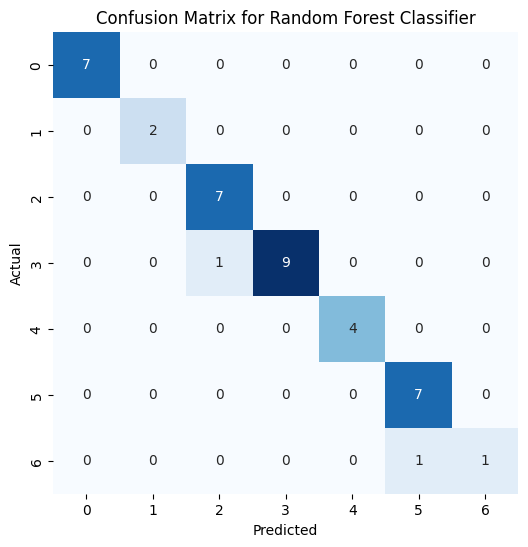

In [335]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [336]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         2
         2.0       0.88      1.00      0.93         7
         3.0       1.00      0.90      0.95        10
         4.0       1.00      1.00      1.00         4
         5.0       0.88      1.00      0.93         7
         6.0       1.00      0.50      0.67         2

    accuracy                           0.95        39
   macro avg       0.96      0.91      0.93        39
weighted avg       0.96      0.95      0.95        39



In [337]:
from catboost import CatBoostClassifier  # applying cat boost for classification

cat=CatBoostClassifier(silent=True).fit(X_train,y_train)

y_pred=cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)
accuracy_score(y_test,y_pred)

0.9487179487179487

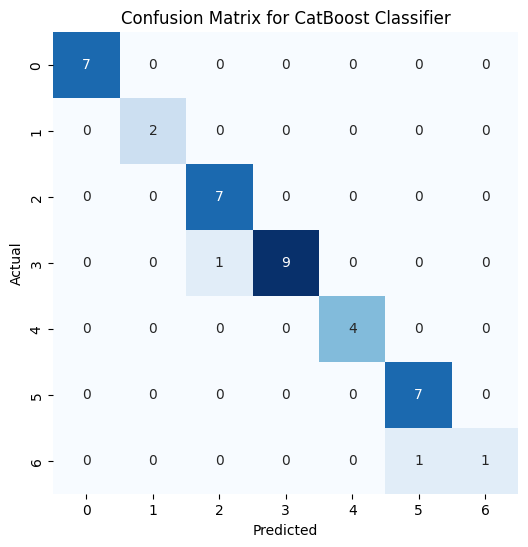

In [338]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


In [339]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         2
         2.0       0.88      1.00      0.93         7
         3.0       1.00      0.90      0.95        10
         4.0       1.00      1.00      1.00         4
         5.0       0.88      1.00      0.93         7
         6.0       1.00      0.50      0.67         2

    accuracy                           0.95        39
   macro avg       0.96      0.91      0.93        39
weighted avg       0.96      0.95      0.95        39



In [340]:
# predict the mix movement serie with CatBoost
y_pred_mix = cat.predict(X_mix)
print(y_pred_mix)
accuracy_score(y_mix,y_pred_mix)
df = pd.DataFrame(y_pred_mix)
print(accuracy_score(y_mix,y_pred_mix))
df.to_csv(r"C:\Users\emmie\Documents\DTU\Special course\Code\classification_kaggle\our_input_subject2\results_pca4.csv", index=False, header=False)

[[3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [2.]
 [2.]]
0.14285714285714285
